In [1]:
#Name: Ayush Mahadik
#Task: Decision Tree
#Batch: LGMVIP - DataScience (May)
#Details: Below are thr queries preformed using dataset also performed some plottings for better understanding of data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import pandas as pd
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:

data = pd.read_csv("/content/Iris.csv")

In [ ]:

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.drop('Id', axis = 1, inplace = True)      
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.nunique() 

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [ ]:
data.Species.value_counts()  


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:

data.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [ ]:

data.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

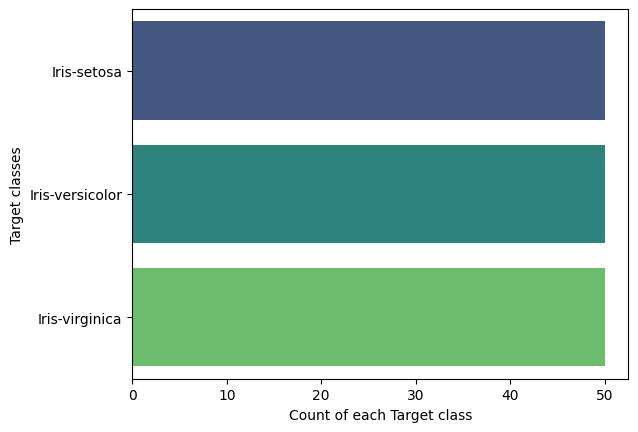

In [ ]:
# target Class Count
sns.countplot(y=data.Species ,data=data, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

SepalLengthCm       Axes(0.125,0.653529;0.352273x0.226471)
SepalWidthCm     Axes(0.547727,0.653529;0.352273x0.226471)
PetalLengthCm       Axes(0.125,0.381765;0.352273x0.226471)
PetalWidthCm     Axes(0.547727,0.381765;0.352273x0.226471)
dtype: object

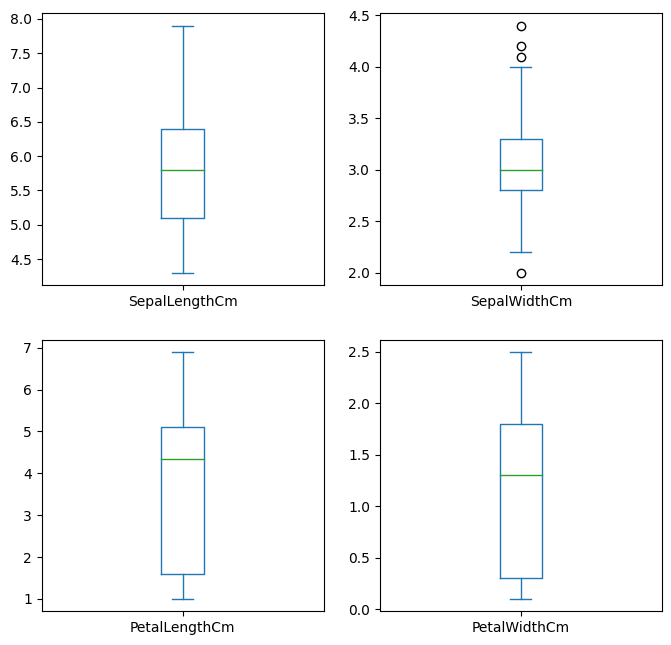

In [ ]:
data.plot(kind = 'box', subplots=True, layout = (3,2), figsize = (8,12))

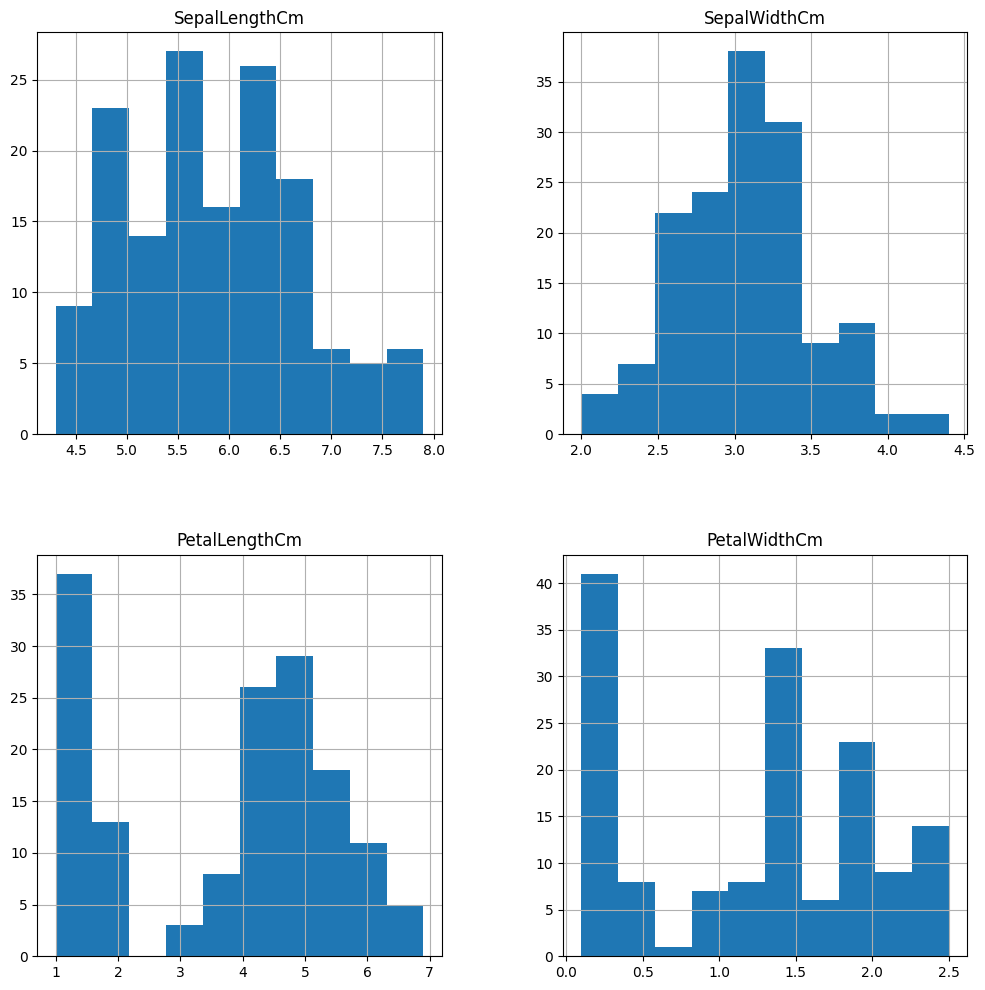

In [ ]:
data.hist(figsize=(12,12))
plt.show()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

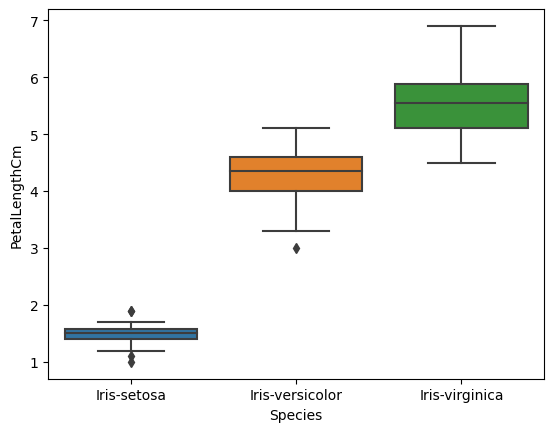

In [ ]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data=data)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

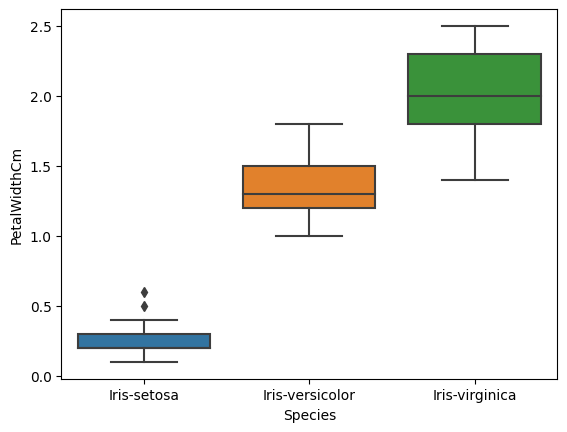

In [ ]:

sns.boxplot(x = 'Species', y = 'PetalWidthCm', data=data)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

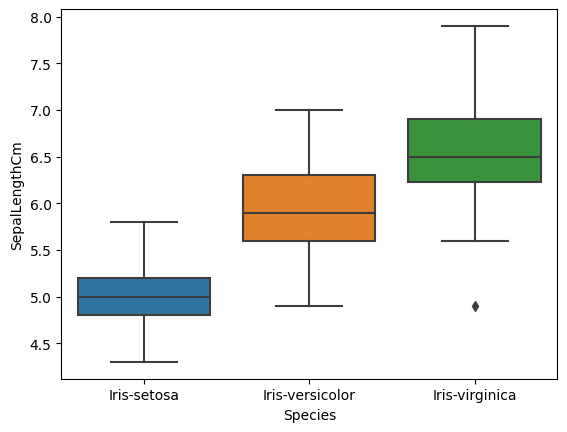

In [ ]:

sns.boxplot(x = 'Species', y = 'SepalLengthCm', data=data)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

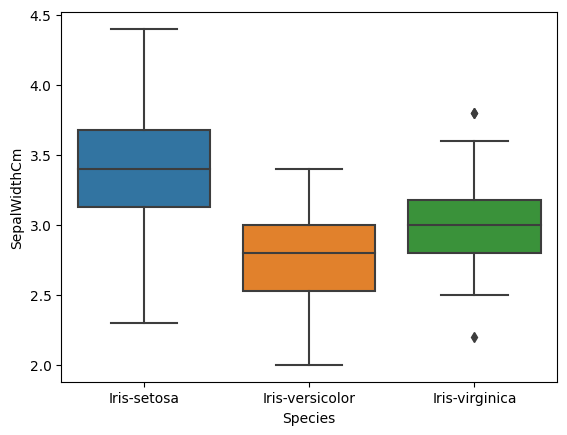

In [ ]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=data)

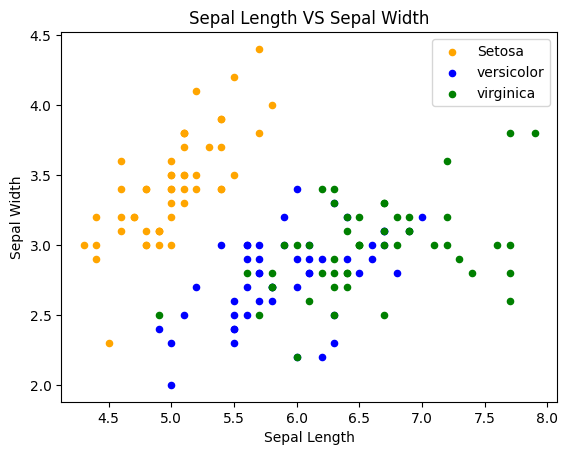

In [ ]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

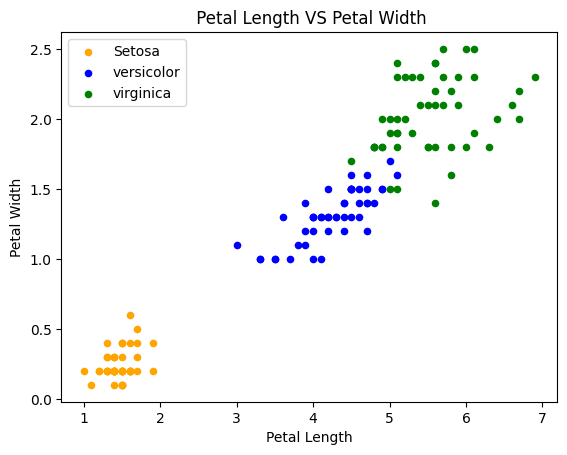

In [ ]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

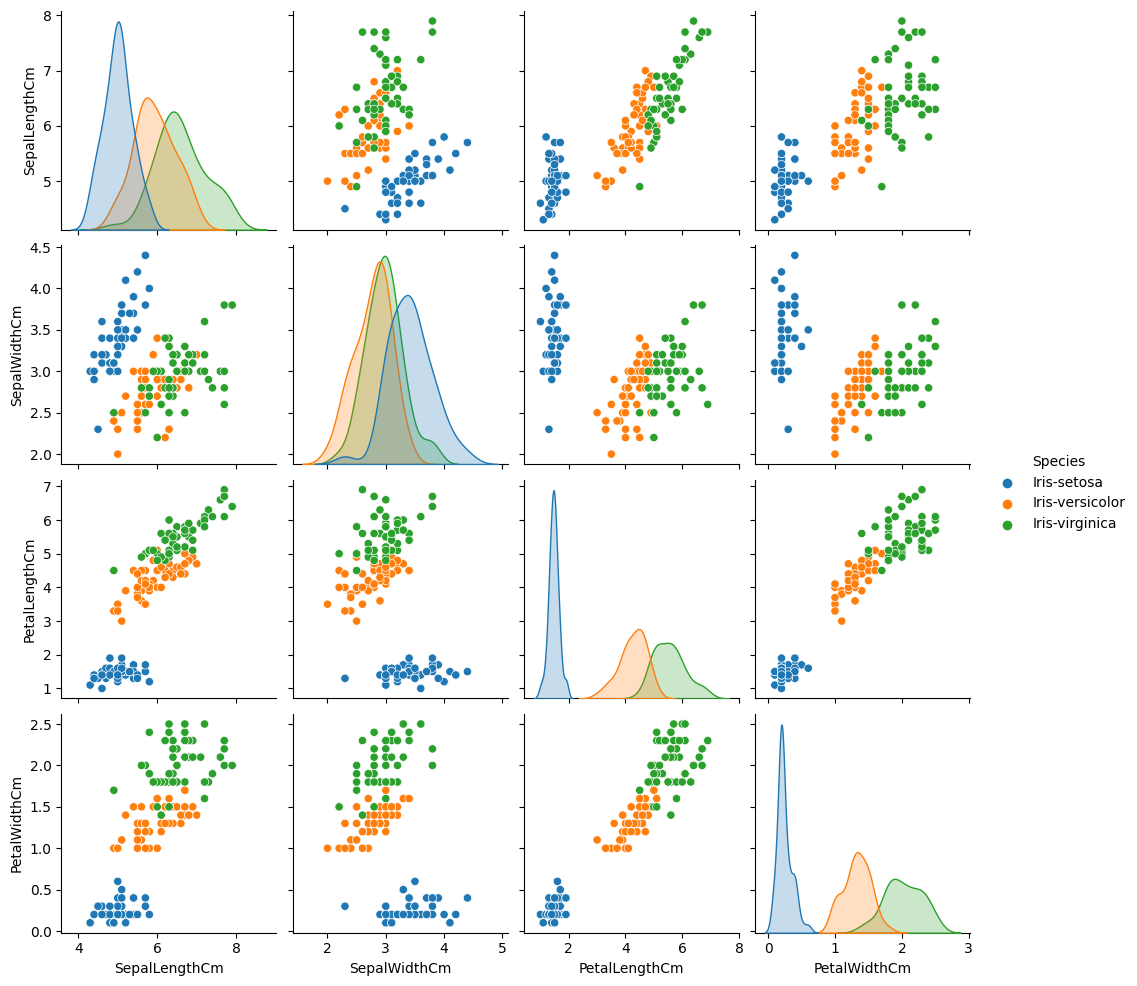

In [ ]:

sns.pairplot(data, hue = 'Species')    

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-26-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


<ipython-input-27-58319fe9e582>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap = 'cubehelix_r')


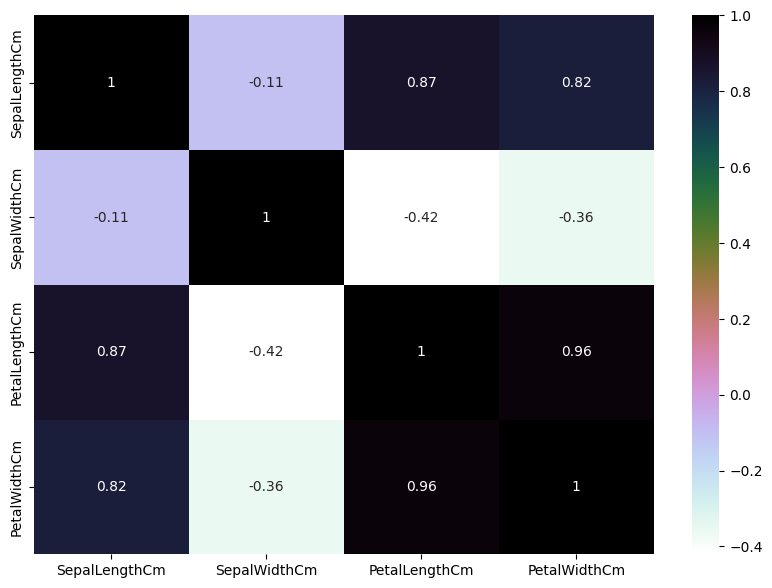

In [ ]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), annot=True, cmap = 'cubehelix_r')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Species'] = le.fit_transform(data['Species'])     #returns encoding labels
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = data.drop(columns = ['Species'])  

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = data['Species']       #target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
tt = train_test_split
xtrain, xtest, ytrain, ytest = tt(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [ ]:
models = [lr, knn, svc, gnb, dtc, rfc]
scores = []

for model in models:
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  scores.append(accuracy_score(ytest, ypred))
  print("Accuracy of " + type(model).__name__+ ' is', accuracy_score(ytest, ypred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 1.0
Accuracy of DecisionTreeClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9777777777777777


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(ytest, ypred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

<Axes: >

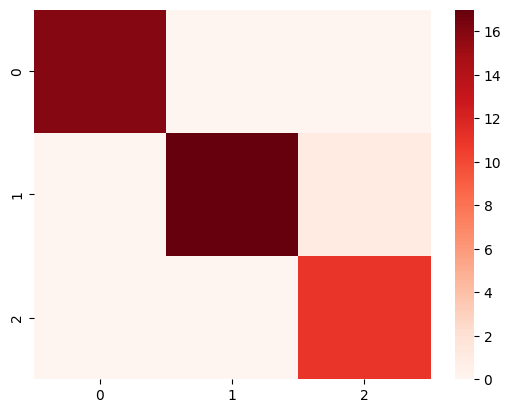

In [ ]:
sns.heatmap(cm, cmap = 'Reds')

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

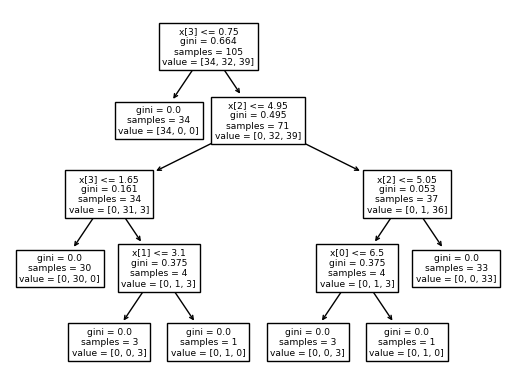

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [ ]:
Species_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [ ]:
Species_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
prediction=Species_tree.predict(xtest)

In [ ]:
print(prediction[0:5])
print(ytest[0:5])

[2 1 0 2 0]
114    2
62     1
33     0
107    2
7      0
Name: Species, dtype: int64


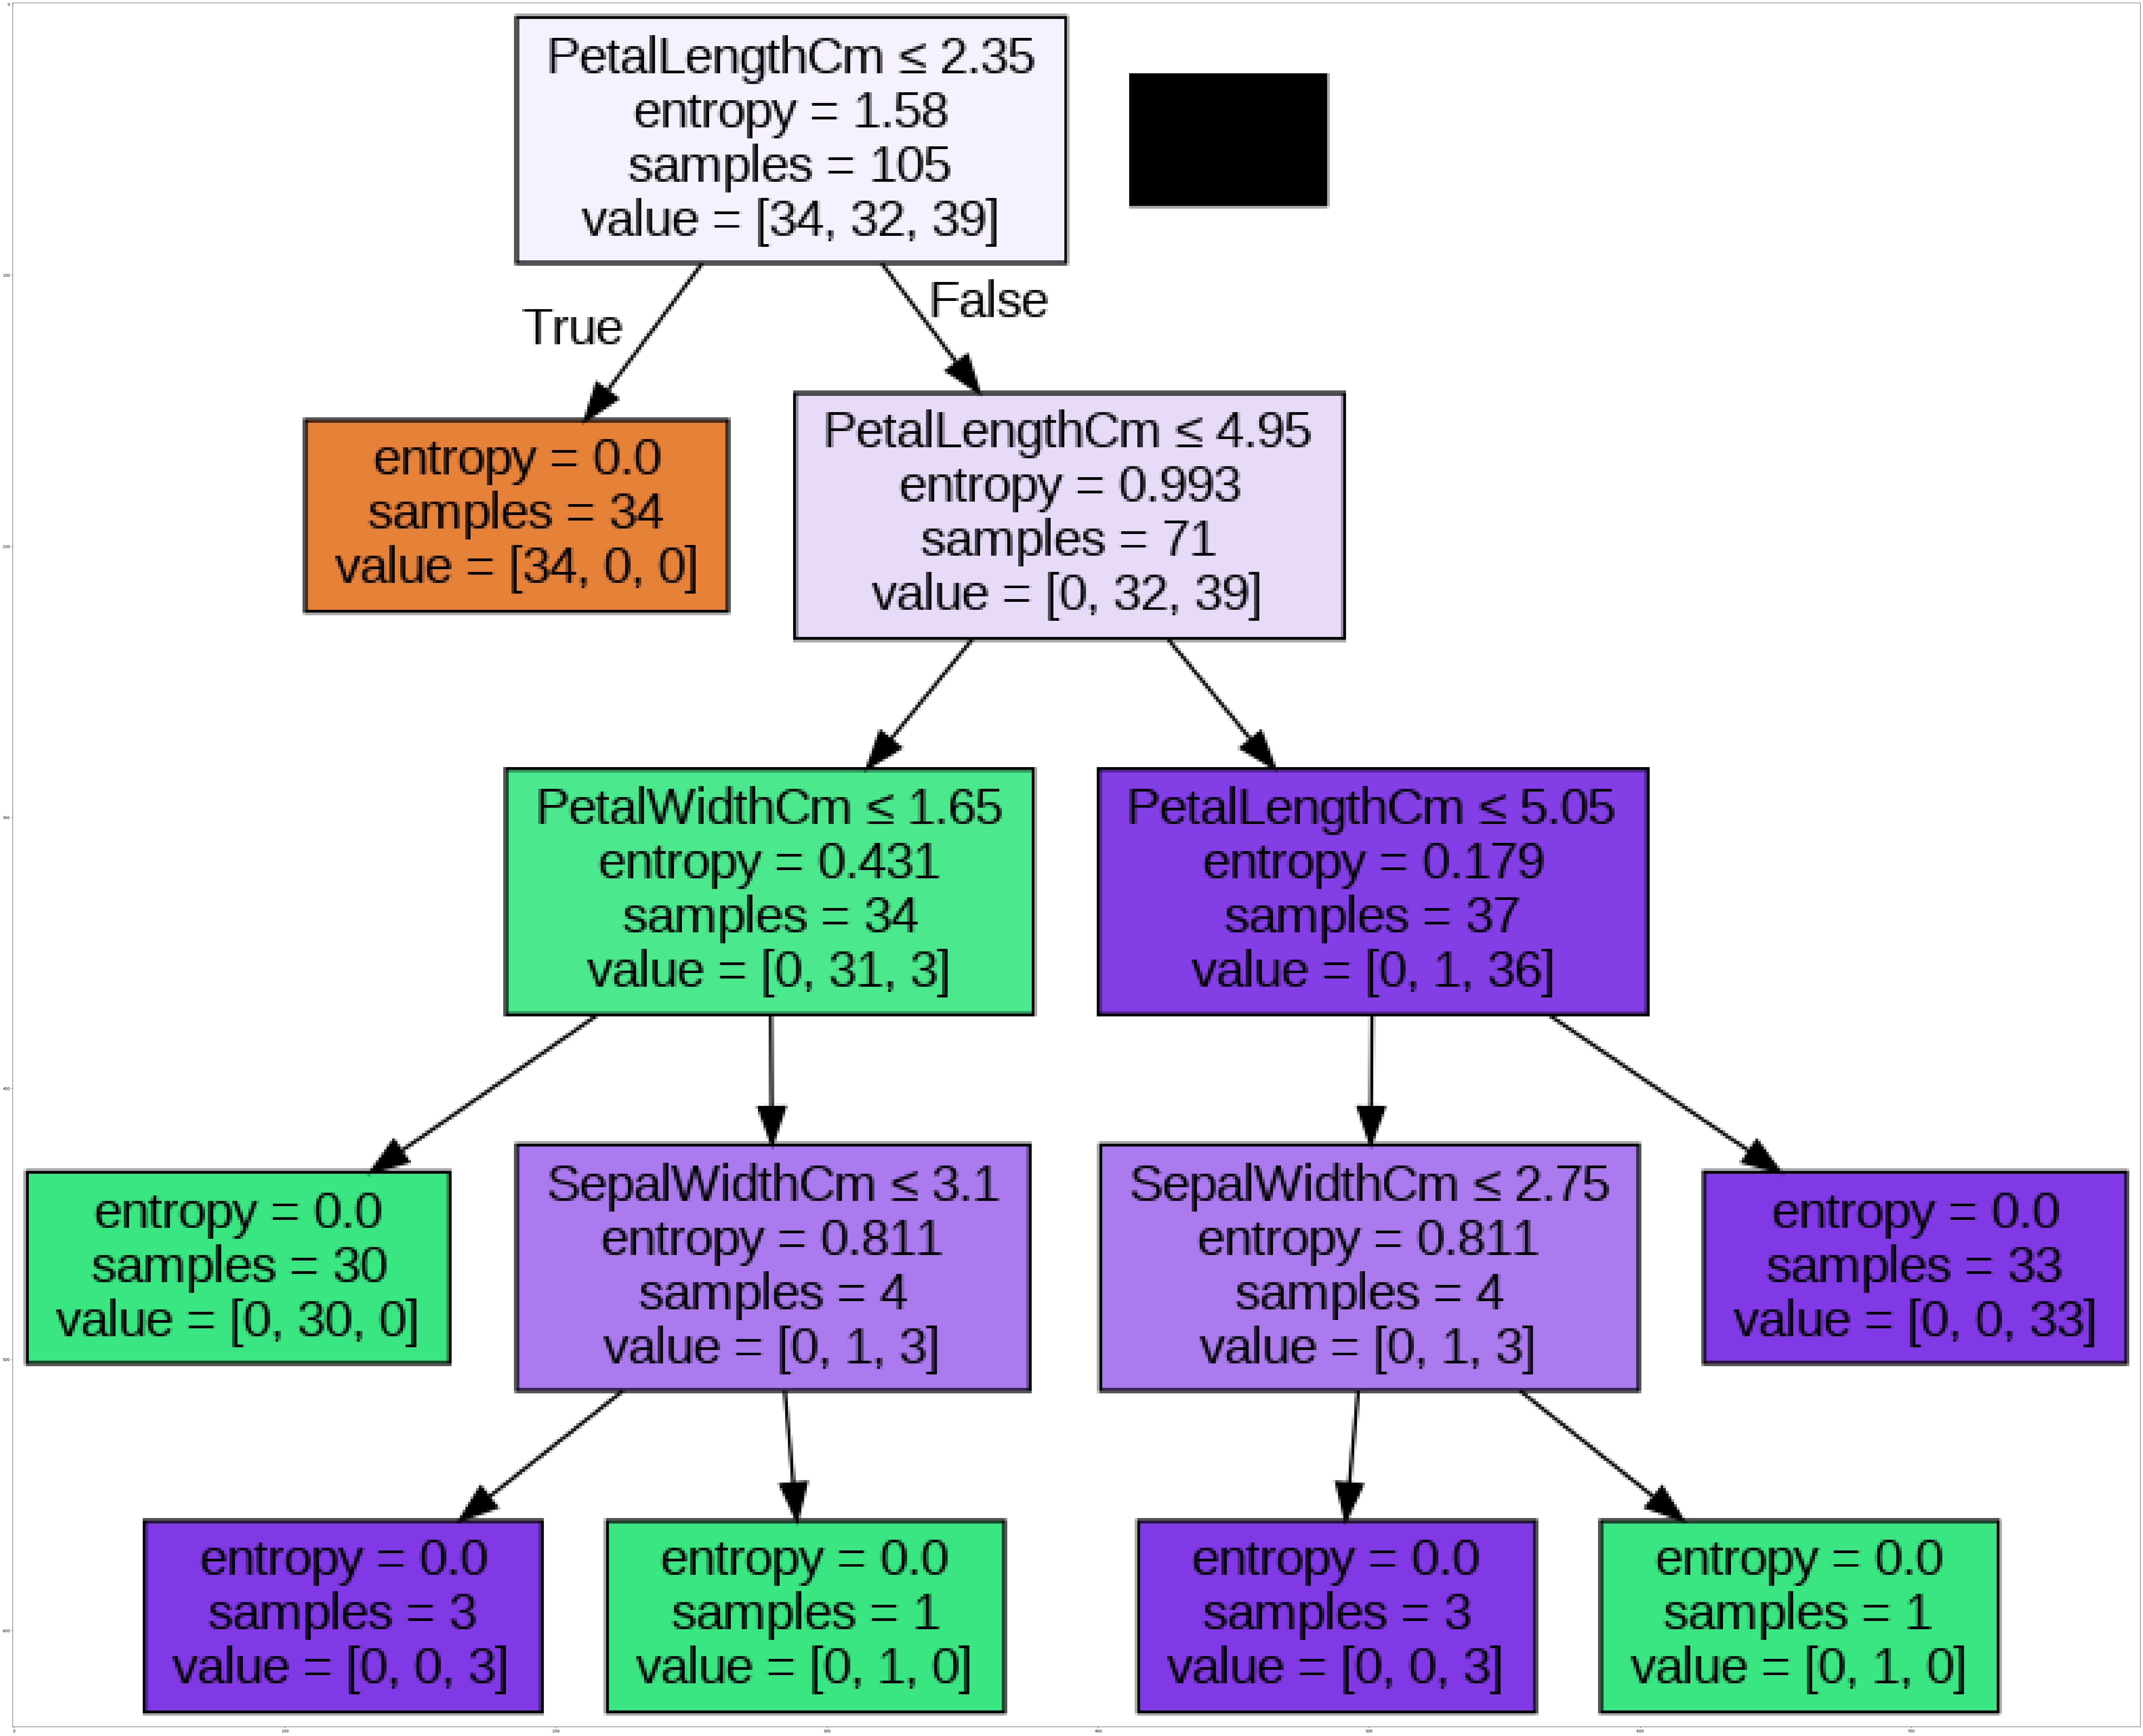

In [ ]:
#Printing the Decision Tree
dot_data = StringIO()
filename = "Speciestree.png"
featureNames = data.columns[0:4]
targetNames = data["Species"].unique().tolist()
out=tree.export_graphviz(Species_tree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

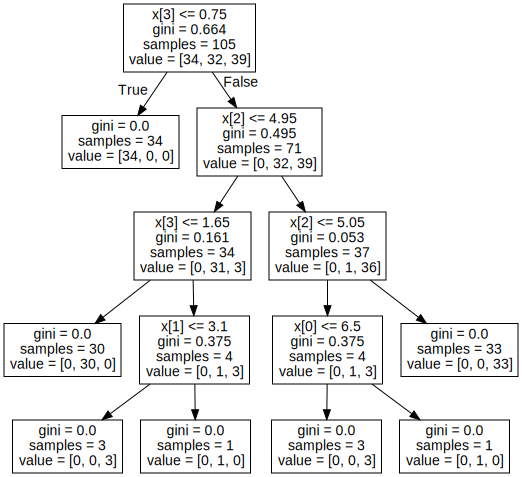

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file = None)

graph = graphviz.Source(dot_data)
graph